In [1]:
"""
- tensor : 동적 크기를 갖는 다차원 데이터 배열
- rank : tensor 의 차원
- 차원을 표기하는 다른 방법
    - shape : [], [D0], [D0,D1], ...
    - rank : 0, 1, 2, ...
    - dimension number : 0-D, 1-D, 2-D
"""

import tensorflow as tf

points = [[1, 1], [2, 2]]
vectors = tf.constant(points)
expanded_vectors = tf.expand_dims(vectors, 0)

print(expanded_vectors)
print(expanded_vectors.get_shape())


Tensor("ExpandDims:0", shape=(1, 2, 2), dtype=int32)
(1, 2, 2)


In [2]:
import numpy as np

num_points = 2000
vectors_set = []

for i in range(num_points):
    if np.random.random() > 0.5:
        vectors_set.append([np.random.normal(0.0, 0.9), np.random.normal(0.0, 0.9)])
    else:
        vectors_set.append([np.random.normal(3.0, 0.5), np.random.normal(1.0, 0.5)])

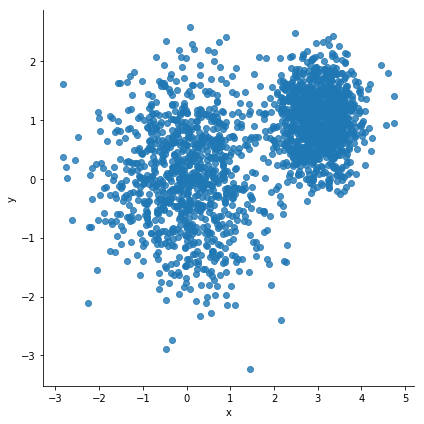

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.DataFrame({"x": [v[0] for v in vectors_set], 
                  "y": [v[1] for v in vectors_set]})
sns.lmplot("x", "y", data=df, fit_reg=False, size=6)
plt.show()

In [23]:
import tensorflow as tf

# 모든 데이터를 텐서로 옮김
vectors = tf.constant(vectors_set)
print("vectors shape : {}".format(vectors.get_shape()))
k = 2
centroids = tf.Variable(tf.slice(tf.random_shuffle(vectors), [0, 0], [k, -1]))
print("centroids shape : {}".format(centroids.get_shape()))

# 차원의 크기가 다른 두 텐서를 뺄셈하기 전에 차원을 확장  
expanded_vectors = tf.expand_dims(vectors, 0)
print("expanded vectors : {}".format(expanded_vectors.get_shape()))
expanded_centroids = tf.expand_dims(centroids, 1)
print("expanded centroids : {}".format(expanded_centroids.get_shape()))

# 유클리드 제곱 거리
diff = tf.subtract(expanded_vectors, expanded_centroids)
print("diff centroids : {}".format(diff.get_shape()))
sqr = tf.square(diff)
print("sqr centroids : {}".format(sqr.get_shape()))
distance = tf.reduce_sum(sqr, 2)
print("distance centroids : {}".format(distance.get_shape()))
assignment = tf.argmin(distance, 0)
print("assignment centroids : {}".format(assignment.get_shape()))

means = tf.concat([tf.reduce_mean(tf.gather(vectors, tf.reshape(tf.where(tf.equal(assignment, c)),
                                                                [1, -1])), reduction_indices=[1]) for c in range(k)], 0)

update_centroids = tf.assign(centroids, means)

init_op = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init_op)

for step in range(100):
    _, centroid_values, assignment_values = sess.run([update_centroids, centroids, assignment])


vectors shape : (2000, 2)
centroids shape : (2, 2)
expanded vectors : (1, 2000, 2)
expanded centroids : (2, 1, 2)
diff centroids : (2, 2000, 2)
sqr centroids : (2, 2000, 2)
distance centroids : (2, 2000)
assignment centroids : (2000,)


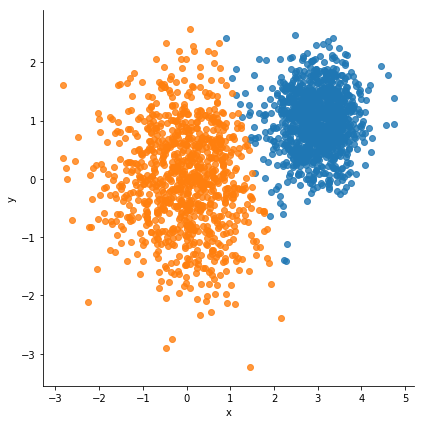

In [21]:
data = {"x": [], "y": [], "cluster": []}

for i in range(len(assignment_values)):
    data["x"].append(vectors_set[i][0])
    data["y"].append(vectors_set[i][1])
    data["cluster"].append(assignment_values[i])
    
df = pd.DataFrame(data)
sns.lmplot("x", "y", data=df, fit_reg=False, size=6, legend=False, hue="cluster")
plt.show()
